<a href="https://colab.research.google.com/github/teknas777/Module2_Capstone_Project/blob/main/Fedex_logistics_performance_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Fedex Logistics Performance Analysis**

##### **Project Type**    - EDA
##### **Contribution**    - Individual

# **Project Summary**

**Project Summary**

The Exploratory Data Analysis (EDA) of FedEx Logistics focuses on evaluating shipment and delivery patterns to optimize operations, enhance cost efficiency, and improve overall logistics performance. The dataset comprises details on shipment modes, delivery timelines, product categories, associated costs, and vendor information. This analysis aims to uncover actionable insights that enable FedEx to streamline its global operations, implement cost-saving measures, and make informed, data-driven decisions.

**Key Analysis**

Shipment Distribution by Country:
The analysis assessed shipment distributions across countries to identify high-traffic regions. These insights can guide operational improvements, such as increasing shipment frequencies or allocating additional resources to minimize delays in key regions.

Shipment Mode Usage:
The usage of air, sea, and road transportation was analyzed to evaluate the trade-off between speed and cost. Findings highlight the importance of prioritizing air freight for time-sensitive deliveries while utilizing sea and road transport for less urgent, bulk shipments.

Freight Cost vs. Shipment Weight:
A detailed correlation analysis of freight costs and shipment weights revealed patterns that can inform better cost management strategies. By understanding these relationships, FedEx can refine pricing models, ensuring accurate and transparent charges for customers.

Vendor and Product Analysis:
Vendor performance and product types were examined to determine their impact on shipment volumes and costs. The findings highlight key vendor partnerships and opportunities to negotiate more favorable terms with suppliers contributing significantly to shipping expenses.

**Findings and Recommendations**

Optimize High-Traffic Routes:
Prioritize countries with the highest shipment volumes for route optimization. Introducing more efficient delivery lanes or consolidating shipments in these regions can reduce costs and improve delivery timelines.

Leverage Mixed Shipment Modes:
Adopt a hybrid shipment strategy to balance speed and cost. Critical deliveries should be prioritized using air freight, while bulk or less time-sensitive shipments can increasingly utilize sea and road transport for greater cost efficiency.

Refine Pricing Models:
The identified correlation between shipment weight and freight costs presents an opportunity to enhance pricing strategies. Implementing more precise weight thresholds will support transparent and competitive pricing, benefiting both FedEx and its customers.

Enhance Vendor Collaboration:
Strengthen relationships with high-performing vendors to ensure continued efficiency. For vendors associated with higher costs, explore process improvements or renegotiate contract terms to achieve mutual benefits and cost savings.

Implementing these recommendations will enable FedEx Logistics to streamline operations, optimize costs, and enhance customer satisfaction. By leveraging data-driven insights, the company can strengthen its position as a global leader in logistics, delivering efficient and reliable services across diverse markets

## **Github Link**

https://github.com/teknas777/Module2_Capstone_Project/blob/main/Fedex_logistics_performance_analysis.ipynb

# **Problem Statement**

FedEx Logistics faces challenges in optimizing its global supply chain operations, particularly in balancing shipment costs, delivery speed, and operational efficiency. Managing a complex network of shipments across multiple countries, with a variety of products transported via air, sea, and road, requires addressing inefficiencies such as elevated freight costs, suboptimal delivery routes, and inconsistent vendor performance.

This Exploratory Data Analysis (EDA) aims to extract actionable insights from shipment and delivery data to tackle these challenges. By examining shipment patterns, cost structures, and vendor contributions, the analysis seeks to provide recommendations that enable FedEx to streamline its logistics processes, reduce costs, and enhance overall customer satisfaction.

#### **Define Your Business Objective**

The business objective of this project is to optimize FedEx Logistics operations through data-driven analysis aimed at enhancing supply chain processes. The specific goals of the project are:

Enhance supply chain efficiency: Identify bottlenecks and operational inefficiencies to streamline workflows and ensure timely deliveries across global operations.

Reduce freight costs: Analyze shipment data to uncover opportunities for cost savings through optimized routing, strategic carrier selection, and the negotiation of competitive shipping rates.

Elevate customer satisfaction: Gain deeper insights into customer needs and expectations to improve service quality and proactively address any service gaps.

By achieving these objectives, FedEx Logistics will enhance operational efficiency, lower costs, and foster greater customer satisfaction in its global supply chain operations.

## ***1. Know Your Data***

### Import Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px



### Loading the dataset

In [ ]:
#mount the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/SCMS_Delivery_History_Dataset.csv'

In [ ]:
#read the dataset
data = pd.read_csv(file_path)

### Dataset First View

In [ ]:
data.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


### Dataset Rows & Columns count

In [ ]:
data.shape

(10324, 33)

###Dataset info

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

#### Duplicate Values

In [ ]:
data.duplicated().sum()

0

###Null or missing values

In [ ]:
data.isnull().sum()

,0
ID,0
Project Code,0
PQ #,0
PO / SO #,0
ASN/DN #,0
Country,0
Managed By,0
Fulfill Via,0
Vendor INCO Term,0
Shipment Mode,360


### What did you know about your dataset?

The dataset contains information about FedEx's delivery history. It has 10,324 rows and 33 columns. Some of the important columns :

*   Shipment Mode
*   Vendor INCO Term
*   Delivered to Client Date  
*   Delivery Recorded Date
*   Unit Price

There are some misssing values in the dataset, considerably in Dosage, Line item insurance and Shipment mode.

The dataset is intended to offer valuable insights into shipment management, pinpoint bottlenecks or delays, and ensure efficient cost management.

Through data analysis, FedEx Logistics seeks to optimize supply chain operations, enhancing delivery efficiency and minimizing costs to benefit both the company and its customers.

## ***2. Understanding Your Variables***

In [ ]:
data.columns

Index(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)'],
      dtype='object')

In [ ]:
data.describe()

,ID,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Line Item Insurance (USD)
count,10324.000000,10324.000000,10324.000000,1.032400e+04,10324.000000,10324.000000,10037.000000
mean,51098.968229,77.990895,18332.534870,1.576506e+05,21.910241,0.611701,240.117626
std,31944.332496,76.579764,40035.302961,3.452921e+05,45.609223,3.275808,500.190568
min,1.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,12795.750000,30.000000,408.000000,4.314593e+03,4.120000,0.080000,6.510000
50%,57540.500000,60.000000,3000.000000,3.047147e+04,9.300000,0.160000,47.040000
75%,83648.250000,90.000000,17039.750000,1.664471e+05,23.592500,0.470000,252.400000
max,86823.000000,1000.000000,619999.000000,5.951990e+06,1345.640000,238.650000,7708.440000


### Variable Description

The dataset has variables related to shipment details, product information, delivery timelines, and costs.

Some key variables include:

ID: Unique identifier for each shipment.

Project Code: Code assigned to the project.

PQ #: Purchase quotation number.

PO / SO #: Purchase order or sales order number.

ASN/DN #: Advanced shipping notice or delivery note number.

Country: Destination country for the shipment.

Managed By: Entity managing the shipment (e.g., PMO - US).

Fulfill Via: Method of fulfillment (e.g., Direct Drop).

Vendor INCO Term: International commercial terms defining the responsibilities of the buyer and seller.

Shipment Mode: Mode of transportation (e.g., Air, Road).

PQ First Sent to Client Date: Date when the purchase quotation was first sent to the client.

PO Sent to Vendor Date: Date when the purchase order was sent to the vendor.

Scheduled Delivery Date: Planned delivery date.

Delivered to Client Date: Actual delivery date.

Delivery Recorded Date: Date of delivery recording.

Product Group: Category of the product (e.g., ARV).

Sub Classification: More specific product category.

Vendor: Supplier of the product.

Item Description: Detailed description of the item.

Molecule/Test Type: Type of molecule or test (if applicable).

Brand: Brand name of the product.

Dosage: Drug dosage (if applicable).

Dosage Form: Form of the drug (e.g., Tablet).

Unit of Measure (Per Pack): Unit of measurement for the product.

Line Item Quantity: Quantity of items in the shipment.

Line Item Value: Total value of the line item.

Pack Price: Price per pack.

Unit Price: Price per unit.

Manufacturing Site: Location of product manufacturing.

First Line Designation: Designation of the product (e.g., Yes/No).

Weight (Kilograms): Weight of the shipment.

Freight Cost (USD): Cost of shipping.

Line Item Insurance (USD): Insurance cost for the line item.

In [ ]:
#Check unique values for each variable

for i in data.columns.tolist():
  print(f'Unique values in {i} is {data[i].nunique()}')

Unique values in ID is 10324
Unique values in Project Code is 142
Unique values in PQ # is 1237
Unique values in PO / SO # is 6233
Unique values in ASN/DN # is 7030
Unique values in Country is 43
Unique values in Managed By is 4
Unique values in Fulfill Via is 2
Unique values in Vendor INCO Term is 8
Unique values in Shipment Mode is 4
Unique values in PQ First Sent to Client Date is 765
Unique values in PO Sent to Vendor Date is 897
Unique values in Scheduled Delivery Date is 2006
Unique values in Delivered to Client Date is 2093
Unique values in Delivery Recorded Date is 2042
Unique values in Product Group is 5
Unique values in Sub Classification is 6
Unique values in Vendor is 73
Unique values in Item Description is 184
Unique values in Molecule/Test Type is 86
Unique values in Brand is 48
Unique values in Dosage is 54
Unique values in Dosage Form is 17
Unique values in Unit of Measure (Per Pack) is 31
Unique values in Line Item Quantity is 5065
Unique values in Line Item Value is 8

### ***3. Data Wrangling***

### Data Wrangling Code

#### Removing null values

In [ ]:
#correct datatype
data['PQ First Sent to Client Date']=pd.to_datetime(data['PQ First Sent to Client Date'], errors='coerce')
data['PO Sent to Vendor Date']=pd.to_datetime(data['PO Sent to Vendor Date'], errors='coerce')
data['Scheduled Delivery Date']=pd.to_datetime(data['Scheduled Delivery Date'], errors='coerce')
data['Delivered to Client Date']=pd.to_datetime(data['Delivered to Client Date'], errors='coerce')
data['Delivery Recorded Date']=pd.to_datetime(data['Delivery Recorded Date'], errors='coerce')
data['Line Item Insurance (USD)']=pd.to_numeric(data['Line Item Insurance (USD)'])

<ipython-input-86-c0c4ed67e879>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['PQ First Sent to Client Date']=pd.to_datetime(data['PQ First Sent to Client Date'], errors='coerce')
<ipython-input-86-c0c4ed67e879>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['PO Sent to Vendor Date']=pd.to_datetime(data['PO Sent to Vendor Date'], errors='coerce')
<ipython-input-86-c0c4ed67e879>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Scheduled Delivery Date']=pd.to_datetime(data['Scheduled Delivery Date'], errors='coerce')
<ipython-input-86-c0c4ed67e879>:5: Use

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   ID                            10324 non-null  int64         
 1   Project Code                  10324 non-null  object        
 2   PQ #                          10324 non-null  object        
 3   PO / SO #                     10324 non-null  object        
 4   ASN/DN #                      10324 non-null  object        
 5   Country                       10324 non-null  object        
 6   Managed By                    10324 non-null  object        
 7   Fulfill Via                   10324 non-null  object        
 8   Vendor INCO Term              10324 non-null  object        
 9   Shipment Mode                 9964 non-null   object        
 10  PQ First Sent to Client Date  7643 non-null   datetime64[ns]
 11  PO Sent to Vendor Date      

In [ ]:
# Making the dataset analysis ready
data.isnull().sum()

,0
ID,0
Project Code,0
PQ #,0
PO / SO #,0
ASN/DN #,0
Country,0
Managed By,0
Fulfill Via,0
Vendor INCO Term,0
Shipment Mode,360


In [ ]:
data.isnull().sum()/len(data) * 100

,0
ID,0.000000
Project Code,0.000000
PQ #,0.000000
PO / SO #,0.000000
ASN/DN #,0.000000
Country,0.000000
Managed By,0.000000
Fulfill Via,0.000000
Vendor INCO Term,0.000000
Shipment Mode,3.487021


In [ ]:
#delete column PO Sent to Vendor Date
data.drop('PO Sent to Vendor Date',axis=1,inplace=True)

In [ ]:
#fill missing value of PQ First Sent to Client Date
data['PQ First Sent to Client Date'].fillna(data['PQ First Sent to Client Date'].mode()[0],inplace=True)

<ipython-input-91-51914c1838b2>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['PQ First Sent to Client Date'].fillna(data['PQ First Sent to Client Date'].mode()[0],inplace=True)


In [ ]:
#missing value is less than 5% in Line Item Insurace and Shipment mode so we have delete  that rows
data.dropna(subset=['Line Item Insurance (USD)', 'Shipment Mode'], inplace=True)

In [ ]:
data['Shipment Mode'].dropna(inplace=True)

In [ ]:
data.isnull().sum()

,0
ID,0
Project Code,0
PQ #,0
PO / SO #,0
ASN/DN #,0
Country,0
Managed By,0
Fulfill Via,0
Vendor INCO Term,0
Shipment Mode,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9783 entries, 19 to 10323
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   ID                            9783 non-null   int64         
 1   Project Code                  9783 non-null   object        
 2   PQ #                          9783 non-null   object        
 3   PO / SO #                     9783 non-null   object        
 4   ASN/DN #                      9783 non-null   object        
 5   Country                       9783 non-null   object        
 6   Managed By                    9783 non-null   object        
 7   Fulfill Via                   9783 non-null   object        
 8   Vendor INCO Term              9783 non-null   object        
 9   Shipment Mode                 9783 non-null   object        
 10  PQ First Sent to Client Date  9783 non-null   datetime64[ns]
 11  Scheduled Delivery Date       978

In [ ]:
#Data type of Dosage
data['Dosage'].dtypes

dtype('O')

In [ ]:
data['Dosage'].mode()

,Dosage
0,300mg


In [ ]:
#fill the missing value in dosage
data['Dosage'].fillna(data['Dosage'].mode()[0],inplace=True)

<ipython-input-98-92077c769508>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Dosage'].fillna(data['Dosage'].mode()[0],inplace=True)


In [ ]:
#drop columns
data=data.drop(columns=['Project Code','PQ #','PO / SO #', 'ASN/DN #','Vendor INCO Term','PQ First Sent to Client Date','First Line Designation'])

In [ ]:
data.head()

,ID,Country,Managed By,Fulfill Via,Shipment Mode,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Sub Classification,...,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
19,92,Nigeria,PMO - US,Direct Drop,Air,2007-06-19,2007-06-19,2007-06-19,HRDT,HIV test,...,Test kit,100,1000,80000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,341,2682.47,128.00
21,108,Côte d'Ivoire,PMO - US,Direct Drop,Air,2007-10-02,2007-10-02,2007-10-02,ARV,Pediatric,...,Tablet,60,5513,140581.5,25.50,0.42,"BMS Meymac, France",2126,Freight Included in Commodity Cost,224.93
22,115,Vietnam,PMO - US,Direct Drop,Air,2007-10-15,2007-10-15,2007-10-15,ARV,Pediatric,...,Oral suspension,240,1000,1920.0,1.92,0.01,"Aurobindo Unit III, India",941,4193.49,3.07
23,116,Vietnam,PMO - US,Direct Drop,Air,2007-08-27,2007-08-27,2007-08-27,ARV,Adult,...,Tablet,120,500,41095.0,82.19,0.68,ABBVIE Ludwigshafen Germany,117,1767.38,65.75
24,130,Haiti,PMO - US,Direct Drop,Air,2007-08-13,2007-08-21,2007-08-21,HRDT,HIV test,...,Test kit,100,750,53992.5,71.99,0.72,Inverness Japan,171,3518.38,86.39


In [ ]:
#outliers of every column
def calculate_outliers(df, columns):
    outliers = {}

    for col in columns:
        # Convert to numeric, forcing errors to NaN (ignores non-numeric data)
        df[col] = pd.to_numeric(df[col], errors='coerce')

        # Drop rows where the column has NaN values to avoid issues
        df_clean = df.dropna(subset=[col])

        Q1 = df_clean[col].quantile(0.25)  # First quartile (25%)
        Q3 = df_clean[col].quantile(0.75)  # Third quartile (75%)
        IQR = Q3 - Q1  # Interquartile range

        # Define lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Find outliers
        lower_outliers = df_clean[df_clean[col] < lower_bound][col]
        upper_outliers = df_clean[df_clean[col] > upper_bound][col]

        # Store the results in a dictionary
        outliers[col] = {
            'lower_bound': lower_bound,
            'upper_bound': upper_bound,
            'lower_outliers': lower_outliers,
            'upper_outliers': upper_outliers
        }

    return outliers

# List of numeric columns
numeric_columns = ['Unit of Measure (Per Pack)', 'Line Item Quantity',
                   'Line Item Value', 'Pack Price', 'Unit Price',
                   'Weight (Kilograms)', 'Freight Cost (USD)',
                   'Line Item Insurance (USD)']

# Get the outliers for all numeric columns
outliers = calculate_outliers(data, numeric_columns)

# Display outlier summary
for col, d in outliers.items():
    print(f"Column: {col}")
    print(f"  Lower bound: {abs(d['lower_bound'])}")
    print(f"  Upper bound: {d['upper_bound']}")
    print(f"  Number of lower outliers: {len(d['lower_outliers'])}")
    print(f"  Number of upper outliers: {len(d['upper_outliers'])}")
    print("\n")



Column: Unit of Measure (Per Pack)
  Lower bound: 60.0
  Upper bound: 180.0
  Number of lower outliers: 0
  Number of upper outliers: 936


Column: Line Item Quantity
  Lower bound: 25620.0
  Upper bound: 43788.0
  Number of lower outliers: 0
  Number of upper outliers: 1267


Column: Line Item Value
  Lower bound: 244450.18750000003
  Upper bound: 418670.11250000005
  Number of lower outliers: 0
  Number of upper outliers: 1056


Column: Pack Price
  Lower bound: 24.25
  Upper bound: 51.349999999999994
  Number of lower outliers: 0
  Number of upper outliers: 1071


Column: Unit Price
  Lower bound: 0.4749999999999999
  Upper bound: 1.005
  Number of lower outliers: 0
  Number of upper outliers: 833


Column: Weight (Kilograms)
  Lower bound: 4542.5
  Upper bound: 8141.5
  Number of lower outliers: 0
  Number of upper outliers: 599


Column: Freight Cost (USD)
  Lower bound: 16390.122499999998
  Upper bound: 33194.2575
  Number of lower outliers: 0
  Number of upper outliers: 374


Co

In [ ]:
# shipment mode in which country
ship=pd.DataFrame(data.groupby('Shipment Mode')['Country'].unique().apply(list))
ship
data.groupby('Shipment Mode')['Country'].nunique().sort_values(ascending=False)

,Country
Shipment Mode,
Air,43
Truck,22
Ocean,14
Air Charter,6


In [ ]:
#which country has which manufaturing site
manufacturing_site=pd.DataFrame(data.groupby('Country')['Manufacturing Site'].unique().apply(list))
manufacturing_site

,Manufacturing Site
Country,
Afghanistan,"[Micro Labs, Hosur, India, Gland Pharma, Hyder..."
Angola,"[ABBVIE GmbH & Co.KG Wiesbaden, Trinity Biotec..."
Belize,"[Aurobindo Unit III, India]"
Benin,"[Inverness Japan, Standard Diagnostics, Korea,..."
Botswana,"[Trinity Biotech, Plc, Pacific Biotech, Thaila..."
Burkina Faso,"[Hetero Unit III Hyderabad IN, ABBVIE Ludwigsh..."
Burundi,"[Alere Medical Co., Ltd., Chembio Diagnostics ..."
Cameroon,"[Trinity Biotech, Plc, Alere Medical Co., Ltd...."
"Congo, DRC","[Trinity Biotech, Plc, Alere Medical Co., Ltd...."


In [ ]:
#find which country have how many sites
data.groupby('Manufacturing Site')['Country'].nunique().sort_values(ascending=False)

,Country
Manufacturing Site,
"Aurobindo Unit III, India",29
Hetero Unit III Hyderabad IN,26
Mylan (formerly Matrix) Nashik,26
"Trinity Biotech, Plc",24
"Alere Medical Co., Ltd.",24
...,...
"Gland Pharma, Hyderabad, IN",1
Gland Pharma Ltd Pally Factory,1
"GSK, U1, Poznan, Poland",1


In [ ]:
#which country have most and least order
data.groupby('Country')['ID'].count().sort_values(ascending=False)

,ID
Country,
South Africa,1406
Nigeria,1194
Côte d'Ivoire,1083
Uganda,779
Vietnam,688
Zambia,683
Haiti,655
Mozambique,631
Zimbabwe,538


In [ ]:
#make column of difference between scheduled dilevery date and actual delivery date
data['Scheduled Delivery Date']=pd.to_datetime(data['Scheduled Delivery Date'])
data['Delivered to Client Date']=pd.to_datetime(data['Delivered to Client Date'])
data['Delivery Time']=data['Scheduled Delivery Date']-data['Delivered to Client Date']
data['Delivery Time'].sort_values(ascending=False)
# add column in dataframe
data['Delivery Time']=data['Delivery Time'].dt.days

<ipython-input-12-31fa295c125f>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Scheduled Delivery Date']=pd.to_datetime(data['Scheduled Delivery Date'])
<ipython-input-12-31fa295c125f>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Delivered to Client Date']=pd.to_datetime(data['Delivered to Client Date'])


In [ ]:
data.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD),Delivery Time
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN,0
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN,0
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN,0
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN,0
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN,0



### What manipulations were performed, and what insights were uncovered?

Data Type Conversion

Date columns were seamlessly converted from object to datetime format, enabling precise date-related operations and calculations.
Handling Missing Values:

The PO Sent to Vendor Date column was removed due to excessive missing data.
Rows with missing values in Line Item Insurance (USD) and Shipment Mode were excluded, as they formed a negligible fraction of the dataset.
Missing values in PQ First Sent to Client Date and Dosage were imputed using their respective mode, ensuring consistency.
Outlier Detection:

Potential outliers in numeric columns like Unit of Measure (Per Pack) and Line Item Quantity were flagged using the interquartile range (IQR) method, setting the stage for deeper investigation.
Shipment Mode & Country Insights:

Analyzed shipment modes across countries to reveal distribution patterns.
Identified the number of unique countries served by each shipment mode.
Manufacturing Site & Country Dynamics:

Explored the association between manufacturing sites and countries, highlighting production locations.
Calculated the count of unique countries linked to each manufacturing site.
Order Distribution by Country:

Tabulated and ranked countries based on the count of unique orders, identifying market hotspots and low-demand areas.
Delivery Time Analysis:

Introduced a new metric, Delivery Time, by calculating the difference between the Scheduled Delivery Date and the Delivered to Client Date. This reveals trends in delivery delays and early completions.





## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

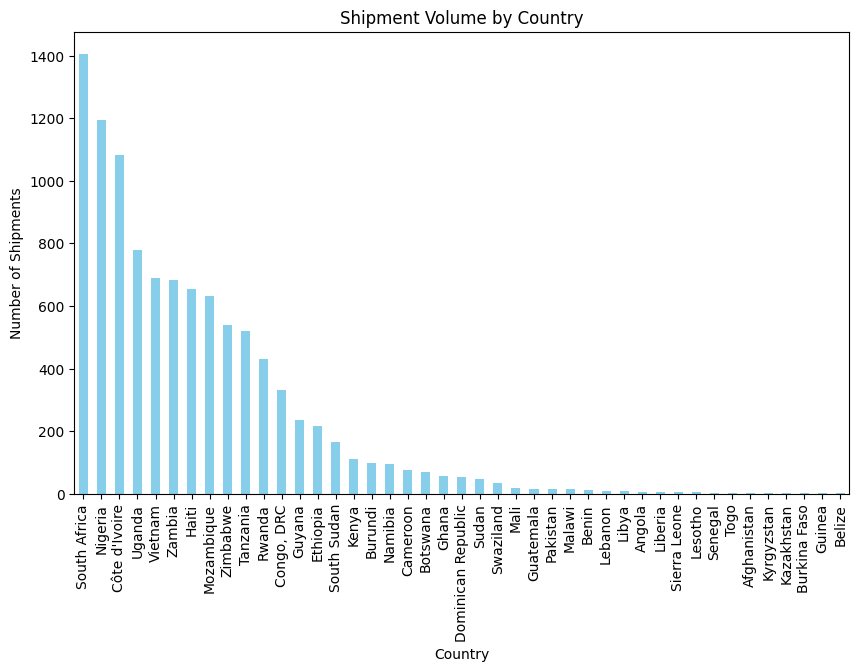

In [ ]:
# 1. Shipment Volume by Country
plt.figure(figsize=(10,6))
data['Country'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Shipment Volume by Country')
plt.xlabel('Country')
plt.ylabel('Number of Shipments')
plt.xticks(rotation=90)
plt.show()

#### 1. Why did you choose the specific chart?

A bar chart illustrating shipment volumes across destination countries provides valuable insights into the countries with the highest shipment activity. This analysis aids in identifying key market focuses and understanding distribution trends.

#### 2. What is/are the insight(s) found from the chart?

This bar chart depicts the shipment volumes for each country, highlighting South Africa as the leading destination, followed by Nigeria and Cote d'lvoire
. These insights underscore the primary markets with the highest shipment activity.

 #### 3. Will the gained insights help creating a positive business impact?

These insights can inform strategic resource allocation, enhance delivery efficiency, and support targeted marketing efforts. However, FedEx should mitigate the risk of over-dependence on a limited number of markets and actively monitor emerging regions for potential growth opportunities.

#### Chart-2

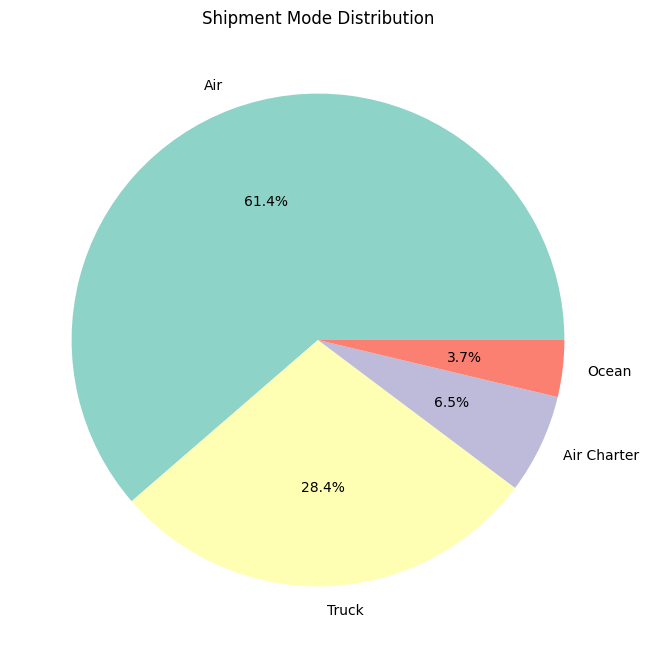

In [ ]:
# 2. Shipment Mode Distribution
plt.figure(figsize=(8,8))
data['Shipment Mode'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette("Set3"))
plt.title('Shipment Mode Distribution')
plt.ylabel('')
plt.show()

#### 1. Why did you pick the specific chart?

A pie chart can effectively illustrate the distribution of various transportation methods, such as air, sea, and land. This visual representation helps in identifying the most commonly used shipment modes.

#### 2. What is/are the insight(s) found from the chart?

The pie chart provides the following insights into shipment modes:

Air transportation emerges as the predominant mode, representing a significant share of total shipments. This suggests that a majority of deliveries prioritize speed, leveraging air freight's efficiency despite its higher costs.

Ocean freight, in contrast, is the least utilized mode, indicating limited reliance on this slower but more cost-effective option. This may reflect the nature of goods transported, specific destination requirements, or lower demand for ocean shipments within this dataset.

#### 3. Can the insights gained drive positive business outcomes?
Are there any findings that could potentially hinder growth?

Positive Business Impact:

The dominance of air shipments highlights a focus on fast deliveries, which can boost customer satisfaction and foster loyalty.
Strategically utilizing air transport for urgent shipments can optimize costs and enhance profitability.

Potential Negative Growth:

An over-reliance on air transport could result in elevated operational costs, potentially impacting profit margins.
Limited use of ocean freight indicates missed opportunities for cost savings, particularly for non-urgent or bulk shipments.

#### Chart 3

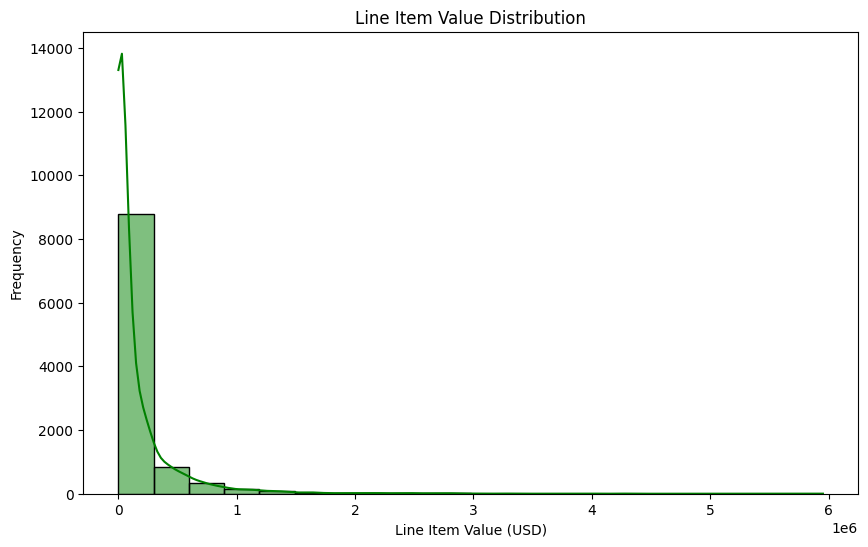

In [ ]:
# 3. Line Item Value Distribution
plt.figure(figsize=(10,6))
sns.histplot(data['Line Item Value'], bins=20, color='green', kde=True)
plt.title('Line Item Value Distribution')
plt.xlabel('Line Item Value (USD)')
plt.ylabel('Frequency')
plt.show()

#### 1. Why did you pick the specific chart?

A histogram of line item values provides insights into the distribution and range of shipment costs. It highlights the prevalence of low-value or high-value shipments, offering valuable data for cost analysis and decision-making.

#### 2. What is/are the insight(s) found from the chart?

The chart reveals the following key insights:

Right-skewed distribution: The majority of line item values are concentrated at the lower end of the range, suggesting that most items are low in value. There is a noticeable drop in frequency as the value increases.

High-value outliers: A long tail on the right indicates the presence of a few items with considerably higher values, though these are infrequent.

In conclusion, while most line items are low in value, there are occasional high-value outliers within the dataset.

#### 3. Can the insights gained drive positive business outcomes? Are there any findings that could potentially hinder growth?

Positive Business Impact:

The high volume of low-value items ensures a steady cash flow, contributing to financial stability.
High-value outliers drive revenue growth through premium or bulk sales, enhancing overall profitability.


Potential Negative Growth:

Relying too heavily on low-value items may result in narrow profit margins, especially if costs rise.
Failing to fully capitalize on high-value items could lead to missed opportunities for growth.

A balanced approach across both segments can maximize profitability, while neglecting either could limit growth potential.

#### Chart-4


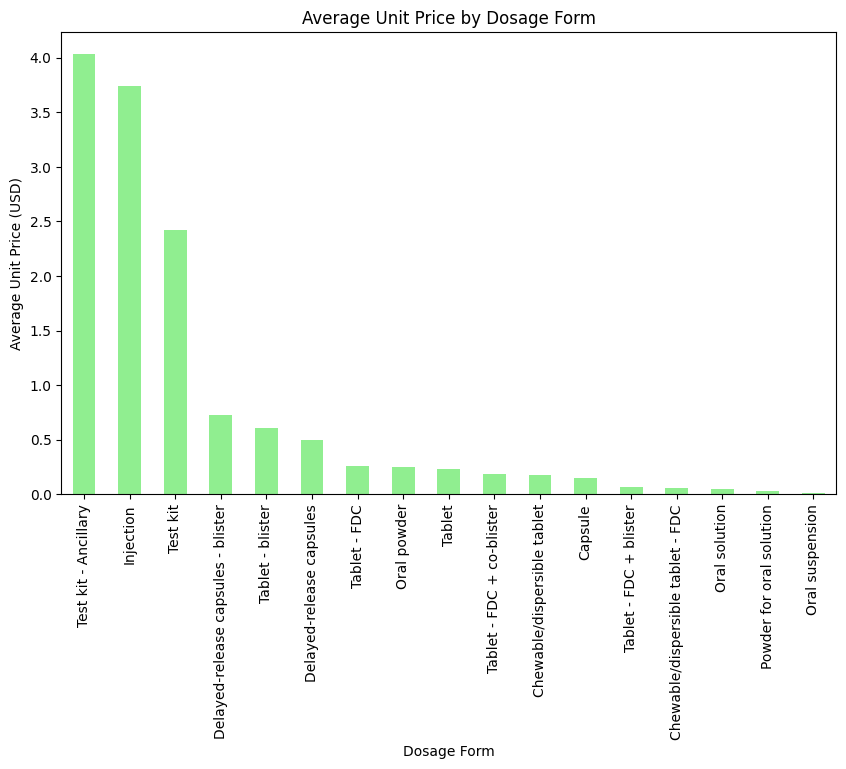

In [ ]:
# 4. Average Unit Price by Dosage Form
plt.figure(figsize=(10,6))
avg_unit_price = data.groupby('Dosage Form')['Unit Price'].mean().sort_values(ascending=False)
avg_unit_price.plot(kind='bar', color='lightgreen')
plt.title('Average Unit Price by Dosage Form')
plt.xlabel('Dosage Form')
plt.ylabel('Average Unit Price (USD)')
plt.xticks(rotation=90)
plt.show()

#### 1. Why did you pick the specific chart?

A box plot effectively illustrates the variability and distribution of pack prices across different product groups. It is a useful tool for identifying price outliers and analyzing variations within various categories, such as pharmaceutical products.

#### 2. What is/are the insight(s) found from the chart?


The chart depicting the Average Unit Price by Dosage Form reveals the following key insights:

Injections have the highest average unit price among all dosage forms, indicating they are the most expensive per unit. This may be attributed to the complexity of their manufacturing processes or the specialized nature of products requiring injections.

Test kits and ancillary items rank second in unit price, suggesting they are premium products or involve specialized production techniques.

Tablets, capsules, and powders exhibit significantly lower average unit prices, positioning them as the most affordable dosage forms. Their lower cost can likely be attributed to standardized production processes and economies of scale.

Overall, the chart underscores a notable price disparity between higher-cost dosage forms, such as injections, and more commonly produced, cost-effective forms like tablets.

#### 3. Can the insights gained drive positive business outcomes? Are there any findings that could potentially hinder growth?

Positive Business Impact:

High-value products, such as injections and test kits, contribute to increased revenue and higher profit margins.
Affordable products, including tablets and capsules, facilitate broad market reach and ensure consistent sales.

Potential Risks to Growth:

Dependence on high-cost products may constrain market expansion due to price sensitivity among customers.

Narrow profit margins on low-cost products could pose profitability challenges in the event of rising production costs.

Achieving sustained growth requires a strategic balance between high-value offerings and cost-effective products to cater to diverse market needs while maintaining profitability.

#### Chart - 5

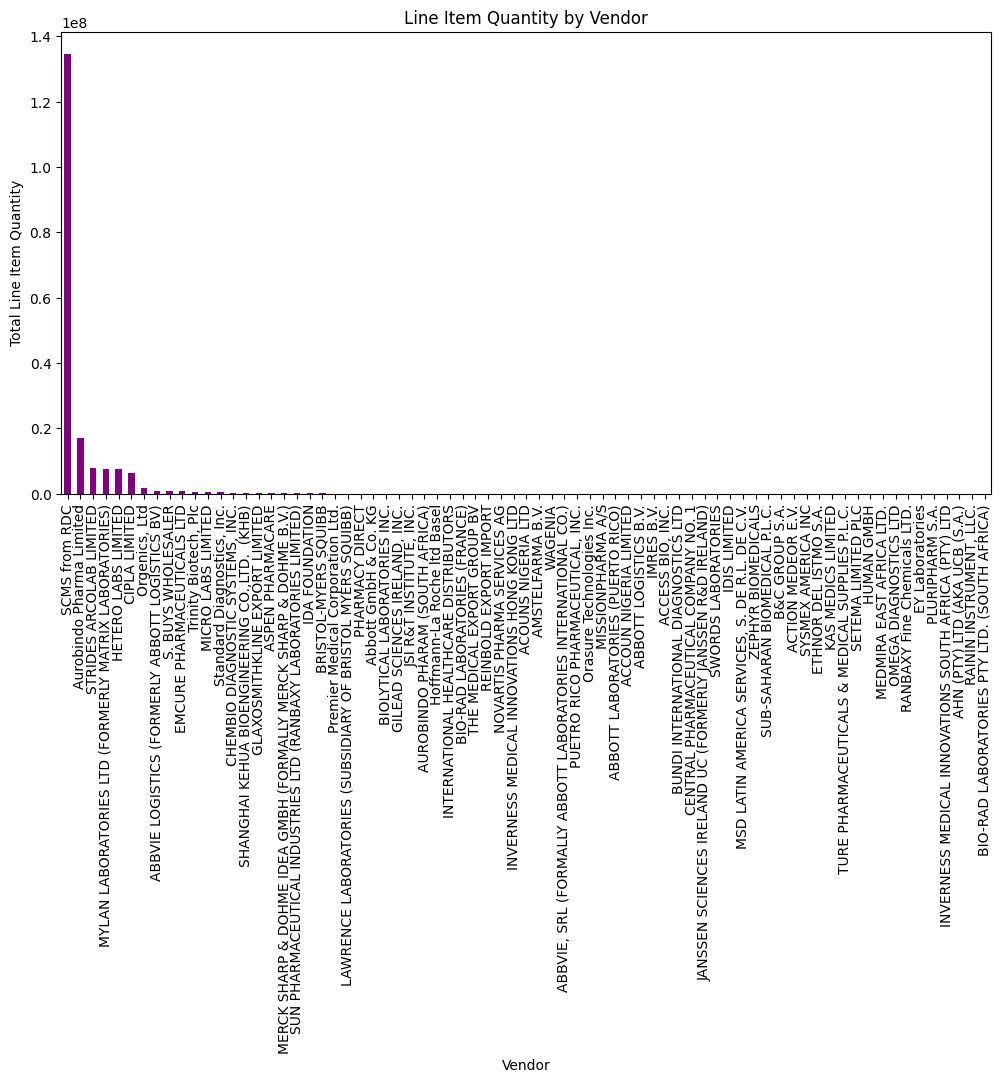

In [ ]:
# 5. Line Item Quantity by Vendor
plt.figure(figsize=(12,6))
data.groupby('Vendor')['Line Item Quantity'].sum().sort_values(ascending=False).plot(kind='bar', color='purple')
plt.title('Line Item Quantity by Vendor')
plt.xlabel('Vendor')
plt.ylabel('Total Line Item Quantity')
plt.xticks(rotation=90)
plt.show()

#### 1. Why did you pick the specific chart?


A bar chart displaying the quantity of line items per vendor provides valuable insights into vendor contributions, highlighting those responsible for supplying the largest volumes. This analysis is instrumental in identifying key vendors that play a significant role in the overall supply chain.

#### 2. What is/are the insight(s) found from the chart?

The Line Item Quantity by Vendor chart provides the following key insights:

Highly Skewed Distribution:
A significant portion of the total line item quantity is supplied by a small number of vendors, such as Aurobindo from RDC and Mylan Laboratories. This highlights a concentrated supply chain where a few vendors handle the majority of product volumes.

Long Tail of Vendors:
A large number of vendors contribute minimal quantities, indicating a fragmented supplier base responsible for only a small share of overall procurement.

Vendor Dependence:
The business appears to rely heavily on a few key vendors, presenting potential risks of supply chain disruptions if these vendors encounter challenges.

These observations underscore opportunities for risk mitigation and supply chain optimization through vendor diversification and strategic planning.

#### 3. Can the insights gained drive positive business outcomes? Are there any findings that could potentially hinder growth?


Positive Business Impact:

Strengthening Key Relationships: The high concentration of purchases from a select group of vendors enables the development of strong partnerships, offering opportunities for cost-saving negotiations and improved collaboration.

Enhanced Procurement Efficiency: Prioritizing key vendors can streamline procurement processes, reduce operational complexity, and drive efficiency.
Potential Risks to Growth:

Dependency on Key Vendors: Over-reliance on a limited number of suppliers increases the risk of supply chain disruptions, which could result in delays, shortages, or operational challenges.

Balancing vendor diversification while maintaining robust relationships with key suppliers is critical to fostering sustainable growth and mitigating risks.

## **5. Solution to Business Objective**

What do you suggest the client to achieve Business Objective ?

Solutions to Business Objectives:

Cost Optimization
Leverage freight cost and insurance data to negotiate more favorable vendor contracts and streamline shipping routes, particularly for high-cost products.

Shipment Mode Efficiency
Evaluate delivery times across shipment modes to prioritize faster or more cost-efficient transportation solutions.

Delivery Time Optimization
Identify vendors or regions prone to delays and implement stricter tracking protocols to minimize late deliveries.

Product and Vendor Performance
Concentrate on high-performing vendors and ensure sufficient stock of high-demand products to prevent delays and maintain seamless operations.

Profitability
Refine pricing strategies by analyzing value-to-weight ratios and introduce tiered shipping charges to enhance profitability.

Customer Satisfaction
Enhance on-time delivery rates and provide real-time updates to customers regarding potential delays to build trust and satisfaction.

Inventory and Fulfillment
Optimize fulfillment strategies based on shipment sizes and improve inventory management processes for high-demand items.

Sustainability
Adopt eco-friendly shipment modes and refine packaging designs to minimize environmental impact.

# **Conclusion**

Through in-depth analysis of FedEx Logistics data using targeted visualizations, we identified significant opportunities to optimize costs, enhance delivery performance, improve customer satisfaction, and boost overall operational efficiency. The insights reveal critical areas for improvement, including shipment mode optimization, vendor performance evaluation, product profitability assessment, and delivery accuracy enhancement.

By implementing strategies such as enhanced vendor negotiations, dynamic fulfillment approaches, and smarter pricing models, FedEx can streamline logistics operations while maintaining superior service standards and minimizing expenses. This data-driven methodology ensures that FedEx remains well-positioned to meet evolving customer demands, drive profitability, and uphold its commitment to sustainability.


### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***